# 常微分方程式

常微分方程式は、次のような形で表される：
$$
\frac{dx}{dt} = f(x,t),
$$
$f(x,t)$ はある関数。
初期条件 $x(t=0) = x_0$ と組み合わせることによって $t>0$ でにおける $x(t)$ の依存性が定義できる。

多くの物理での応用で $t$ は時間変数の役割を果たす（古典力学の問題など）。

いくつかの微分方程式は明示的に解くことができる。たとえば、
$$
\frac{dx}{dt} = \sin t,
$$
の解は次のようになる：
$$
x(t) = x_0 + \int_0^t \sin t' dt' = x_0 + 1 - \cos t.
$$

しかし、一般的なケースでは、解を解析的に求めることはできない。たとえば、次の方程式を考えよう：
$$
\frac{dx}{dt} = -x^3 + \sin t.
$$

この場合、数値的手法に頼ることになる。

## オイラー(Euler)法

次の常微分方程式（ODE）を考える：
$$
\frac{dx}{dt} = f(x,t).
$$

テイラー展開を適用して、$x(t+h)$を$x(t)$の形で表現する：
$$
x(t+h) = x(t) + h \, \frac{dx}{dt} + \mathcal{O}(h^2)~.
$$

$dx/dt = f(x,t)$であり、$h$の高次の項を無視すると次のようになる：
$$
x(t+h) \approx x(t) + h \, f\Big(x(t),t\Big)~.
$$
この関係を反復的に適用し、$t = 0$から出発して、$t > 0$における$x(t)$を評価することができる。

これが*オイラー法*の本質であり、常微分方程式を数値的に解くための最も簡単な方法である。

In [1]:
import numpy as np

def ode_euler_step(f, x, t, h):
    """
    1ステップ h のオイラー法を実行する。
    
    Args:
    （引数）
    f: ODEを定義する関数
    x: 現在のステップにおける従属変数の値
    t: 現在の時間変数の値
    h: 時間ステップ
    
    Returns:
    （戻り値）
    xnew: ステップ t+h における従属変数の値
    """
    return x + h * f(x,t)

def ode_euler(f, x0, t0, h, nsteps):
    """
    常微分方程式 dx/dt = f(x,t) を t = t_0 から t = t_0 + h * steps までオイラー法で解く。

    Args:
    （引数）
          f: ODEを定義する関数
         x0: 従属変数の初期値
         t0: 時間変数の初期値
          h: 時間ステップ
     nsteps: 全部の時間ステップ数

    Returns:
    （戻り値）
    t,x: 時間変数と従属変数の配列
    """
    
    t = np.zeros(nsteps + 1)
    x = np.zeros(nsteps + 1)
    x[0] = x0
    t[0] = t0
    for i in range(0, nsteps):
        t[i + 1] = t[i] + h
        x[i + 1] = ode_euler_step(f, x[i], t[i], h)
    return t,x

オイラー法を使って以下の初期値問題を、$t = 0$ から $t = 10$ まで 1000 ステップで刻んで解こう：
$$
\begin{align}
\frac{dx}{dt} &= -x^3 + \sin t,\\
x(t=0) &= 0
\end{align}
$$

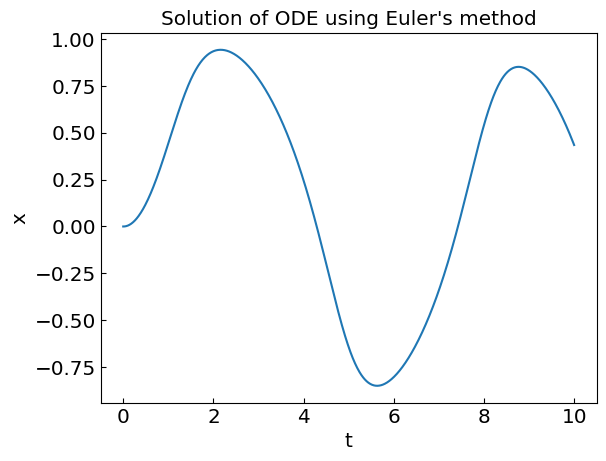

In [2]:
# 微分方程式を定義：
def f(x, t):
    return -x**3 + np.sin(t)

t0 = 0.
tend = 10.0
N = 1000
h = (tend - t0) / N
x0 = 0.

ODEsol = ode_euler(f,x0,t0,h,N)

# 解のプロット
import matplotlib.pyplot as plt
params = {'legend.fontsize': 'large',
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large',
         'xtick.direction':'in',
         'ytick.direction':'in',
         }
plt.rcParams.update(params)

plt.plot(ODEsol[0], ODEsol[1])
plt.xlabel('t')
plt.ylabel('x')
plt.title("Solution of ODE using Euler's method")
plt.show()


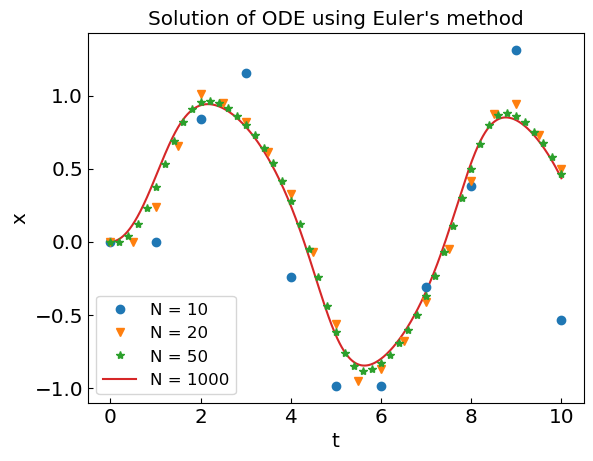

In [3]:
# 微分方程式を定義：
def f(x, t):
    return -x**3 + np.sin(t)
t0 = 0.
tend = 10.0
x0 = 0.

# ステップ数の変更
N = 10
h = (tend - t0) / N
ODEsolN10 = ode_euler(f,x0,t0,h,N)

N = 20
h = (tend - t0) / N
ODEsolN20 = ode_euler(f,x0,t0,h,N)

N = 50
h = (tend - t0) / N
ODEsolN50 = ode_euler(f,x0,t0,h,N)

N = 1000
h = (tend - t0) / N
ODEsolN1000 = ode_euler(f,x0,t0,h,N)

plt.plot(ODEsolN10[0], ODEsolN10[1], 'o', label='N = 10')
plt.plot(ODEsolN20[0], ODEsolN20[1], 'v', label='N = 20')
plt.plot(ODEsolN50[0], ODEsolN50[1], '*', label='N = 50')
plt.plot(ODEsolN1000[0], ODEsolN1000[1], label='N = 1000', zorder=1)
plt.xlabel('t')
plt.ylabel('x')
plt.legend()
plt.title("Solution of ODE using Euler's method")
plt.show()

Euler法の誤差は、各ステップで刻み幅の2乗 $h^2$ に比例する。全ステップ数は $N = (t_{\rm end} - t_0)/h$ なので、合計の蓄積誤差は $\mathcal{O}(h)$ のオーダーになる。

## 中点法 (2次の Runge-Kutta 法、 RK2)

Euler 法よりも良い精度。

Euler法は微分 $dx/dt$ を前方差分で近似していた：
$$
\frac{dx}{dt} = f(x,t) \approx \frac{x(t+h) - x(t)}{h} + \mathcal{O}(h).
$$

前方差分よりも中心差分の方が数値微分の精度が良い：
$$
f(x,t+h/2) \approx \frac{x(t+h) - x(t)}{h} + \mathcal{O}(h^2).
$$

常微分方程式の解法で、この違いを考えよう。
$x(t+h)$ と $x(t)$ をそれぞれ $x(t+h/2)$ の周りでテイラー展開する：
\begin{align}
x(t+h) = x(t + h/2) + \frac{1}{2} h \left( \frac{dx}{dt} \right)_{t+h/2} + \frac{1}{8} h^2 \left( \frac{d^2x}{dt^2} \right)_{t+h/2} + \mathcal{O}(h^3),\\
x(t) = x(t + h/2) - \frac{1}{2} h \left( \frac{dx}{dt} \right)_{t+h/2} + \frac{1}{8} h^2 \left( \frac{d^2x}{dt^2} \right)_{t+h/2} + \mathcal{O}(h^3),\\
\end{align}

第1式から第2式を引くと
\begin{align}
x(t+h) & = x(t) + h \left( \frac{dx}{dt} \right)_{t+h/2} + \mathcal{O}(h^3),\\
& = x(t) + h f\Big(x(t+h/2),t+h/2\Big) + \mathcal{O}(h^3)
\end{align}

今 $x(t)$ までしか解いていないので、$x(t+h/2)$ の値は知らない。なので、Euler 法を使って $x(t+h/2)$ を見積もる：
$$
x(t+h/2) = x(t) + \frac{1}{2}h f(x(t),t) + \mathcal{O}(h^2)
$$

テイラー展開から次が示せる：
$$
f\Big(x(t+h/2),t+h/2\Big) = f\Big(x(t) + \frac{1}{2}h f(x(t),t), t + \frac{1}{2}h\Big) + \mathcal{O}(h^2).
$$

したがって
$$
x(t+h) = x(t) + h f\Big(x(t) + \frac{1}{2}h f(x(t),t), t + \frac{1}{2}h\Big)  + \mathcal{O}(h^3),\\
$$
であり、この表式は再帰的に次のように書ける：
\begin{align}
k_1 & = h \, f\Big(x(t),t\Big), \\
k_2 & = h \, f\Big(x(t)+k_1/2,t+h/2\Big), \\
x(t+h) & = x(t) + k_2~.
\end{align}

RK2は各刻みで局所的な誤差 $\mathcal{O}(h^3)$ を持つ。


In [4]:
import numpy as np

def ode_rk2_step(f, x, t, h):
    """
    1ステップ h の差分を2次の Runge-Kutta 法 (RK2法・中点法) で実行する。
    
    Args:
    （引数）
    f: ODEを定義する関数
    x: 現在のステップにおける従属変数の値
    t: 現在の時間変数の値
    h: 時間ステップ
    
    Returns:
    （戻り値）
    xnew: ステップ t+h における従属変数の値
    """
    k1 = h * f(x,t)
    k2 = h * f(x + k1/2., t + h /2.)
    return x + k2

def ode_rk2(f, x0, t0, h, nsteps):
    """
    常微分方程式 dx/dt = f(x,t) を t = t_0 から t = t_0 + h * steps までRK2法で解く。

    Args:
    （引数）
          f: ODEを定義する関数
         x0: 従属変数の初期値
         t0: 時間変数の初期値
          h: 時間ステップ
     nsteps: 全部の時間ステップ数

    Returns:
    （戻り値）
    t,x: 時間変数と従属変数の配列
    """
    
    t = np.zeros(nsteps + 1)
    x = np.zeros(nsteps + 1)
    x[0] = x0
    t[0] = t0
    for i in range(0, nsteps):
        t[i + 1] = t[i] + h
        x[i + 1] = ode_rk2_step(f, x[i], t[i], h)
    return t,x

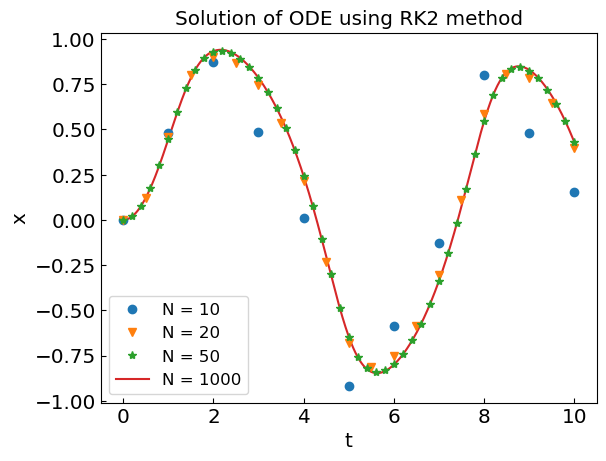

In [5]:
# 微分方程式を定義：
def f(x, t):
    return -x**3 + np.sin(t)
t0 = 0.
tend = 10.0
x0 = 0.

# ステップ数の変更
N = 10
h = (tend - t0) / N
ODEsolN10 = ode_rk2(f,x0,t0,h,N)

N = 20
h = (tend - t0) / N
ODEsolN20 = ode_rk2(f,x0,t0,h,N)

N = 50
h = (tend - t0) / N
ODEsolN50 = ode_rk2(f,x0,t0,h,N)

N = 1000
h = (tend - t0) / N
ODEsolN1000 = ode_rk2(f,x0,t0,h,N)

plt.plot(ODEsolN10[0], ODEsolN10[1], 'o', label='N = 10')
plt.plot(ODEsolN20[0], ODEsolN20[1], 'v', label='N = 20')
plt.plot(ODEsolN50[0], ODEsolN50[1], '*', label='N = 50')
plt.plot(ODEsolN1000[0], ODEsolN1000[1], label='N = 1000', zorder=1)
plt.xlabel('t')
plt.ylabel('x')
plt.legend()
plt.title("Solution of ODE using RK2 method")
plt.show()

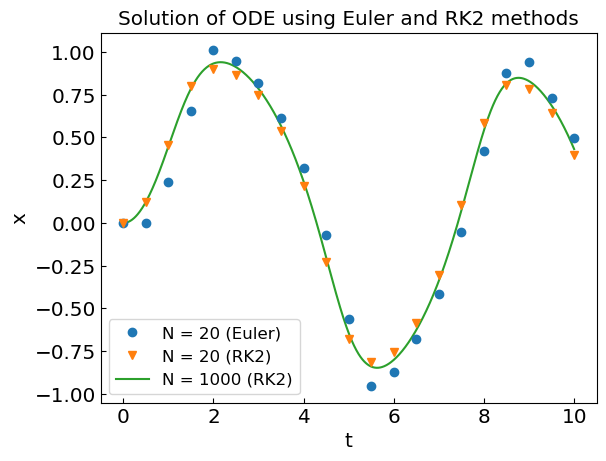

In [6]:
## Compare Euler and RK2 schemes

N = 20
h = (tend - t0) / N
ODEsolN10Euler = ode_euler(f,x0,t0,h,N)
ODEsolN10RK2 = ode_rk2(f,x0,t0,h,N)

N = 1000
h = (tend - t0) / N
ODEsolN1000 = ode_rk2(f,x0,t0,h,N)

plt.plot(ODEsolN10Euler[0], ODEsolN10Euler[1], 'o', label='N = 20 (Euler)')
plt.plot(ODEsolN10RK2[0], ODEsolN10RK2[1], 'v', label='N = 20 (RK2)')
plt.plot(ODEsolN1000[0], ODEsolN1000[1], label='N = 1000 (RK2)', zorder=1)
plt.xlabel('t')
plt.ylabel('x')
plt.legend()
plt.title("Solution of ODE using Euler and RK2 methods")
plt.show()

## 4次の Runge-Kutta 法 (RK4)

2次のアルゴリズムは高次の誤差項を相殺させていくことで、高次のアルゴリズムに一般化できる。
以下の4次のRunge-Kutta法はちょうど良いとされ、数値計算でよく用いられる：
\begin{align}
k_1 &=  h f\Big(x(t), t\Big)\,,\\
k_2 &=  h f\Big(x(t) + \tfrac{k_1}{2}, t+ \tfrac{h}2 \Big)\,,\\
k_3 &=  h f\Big(x(t) + \tfrac{k_2}{2}, t+ \tfrac{h}2 \Big)\,, \\
k_4 &=  h f\Big(x(t) + k_3, t + h\Big)\,,\\
x(t+h) &= x(t) + \tfrac16 (k_1 + 2k_2 + 2k_3 + k_4)\,.
\end{align}



In [7]:
def ode_rk4_step(f, x, t, h):
    """
    1ステップ h の差分を4次の Runge-Kutta 法 (RK4法) で実行する。
    
    Args:
    （引数）
    f: ODEを定義する関数
    x: 現在のステップにおける従属変数の値
    t: 現在の時間変数の値
    h: 時間ステップ
    
    Returns:
    （戻り値）
    xnew: ステップ t+h における従属変数の値
    """
    k1 = h * f(x,t)
    k2 = h * f(x + k1/2., t + h /2.)
    k3 = h * f(x + k2/2., t + h /2.)
    k4 = h * f(x + k3, t + h)
    return x + (k1 + 2. * k2 + 2. * k3 + k4) / 6.

def ode_rk4(f, x0, t0, h, nsteps):
    """
    常微分方程式 dx/dt = f(x,t) を t = t_0 から t = t_0 + h * steps までRK4法で解く。

    Args:
    （引数）
          f: ODEを定義する関数
         x0: 従属変数の初期値
         t0: 時間変数の初期値
          h: 時間ステップ
     nsteps: 全部の時間ステップ数

    Returns:
    （戻り値）
    t,x: 時間変数と従属変数の配列
    """
    
    t = np.zeros(nsteps + 1)
    x = np.zeros(nsteps + 1)
    x[0] = x0
    t[0] = t0
    for i in range(0, nsteps):
        t[i + 1] = t[i] + h
        x[i + 1] = ode_rk4_step(f, x[i], t[i], h)
    return t,x

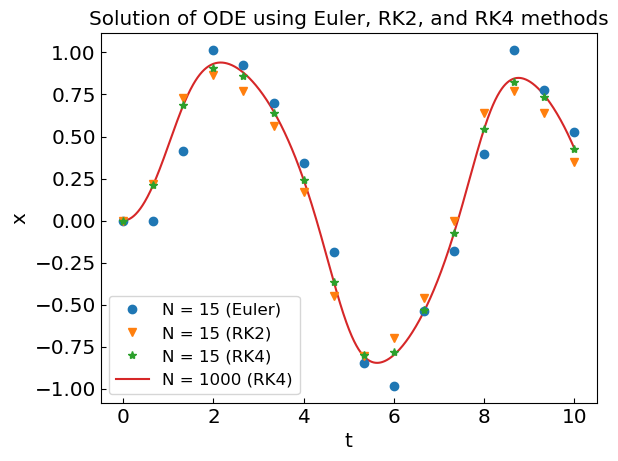

In [8]:
# 微分方程式を定義：
def f(x, t):
    return -x**3 + np.sin(t)
t0 = 0.
tend = 10.0
x0 = 0.

# ステップ数変更
N = 15
h = (tend - t0) / N
ODEsolN10Euler = ode_euler(f,x0,t0,h,N)
ODEsolN10RK2 = ode_rk2(f,x0,t0,h,N)
ODEsolN10RK4 = ode_rk4(f,x0,t0,h,N)

plt.plot(ODEsolN10Euler[0], ODEsolN10Euler[1], 'o', label='N = %d (Euler)' % N)
plt.plot(ODEsolN10RK2[0], ODEsolN10RK2[1], 'v', label='N = %d (RK2)' % N)
plt.plot(ODEsolN10RK4[0], ODEsolN10RK4[1], '*', label='N = %d (RK4)' % N)

N = 1000
h = (tend - t0) / N
ODEsolN1000 = ode_rk4(f,x0,t0,h,N)

plt.plot(ODEsolN1000[0], ODEsolN1000[1], label='N = 1000 (RK4)', zorder=1)
plt.xlabel('t')
plt.ylabel('x')
plt.legend()
plt.title("Solution of ODE using Euler, RK2, and RK4 methods")
plt.show()

## 連立微分方程式

$N$元連立1階常微分方程式：
$$
\frac{d x_1}{dt} = f_1(x_1,\ldots,x_N,t),\\
\frac{d x_2}{dt} = f_2(x_1,\ldots,x_N,t),\\
\ldots \\
\frac{d x_N}{dt} = f_N(x_1,\ldots,x_N,t).
$$

ベクトルで書くと
$$
\frac{d \mathbf{x}}{dt} = \mathbf{f}(\mathbf{x},t).
$$

今まで紹介した手法は、すべてベクトルに率直に拡張できる：
- Euler 法
$$
\mathbf{x}(t+h) = \mathbf{x}(t) + h \, \mathbf{f}[\mathbf{x}(t),t]~.
$$


- RK2
\begin{align}
\mathbf {k_1} & = h \, \mathbf{f}(\mathbf{x},t), \\
\mathbf {k_2} & = h \, \mathbf {f}(\mathbf {x}+\mathbf {k_1}/2,t+h/2), \\
\mathbf{x}(t+h) & = \mathbf {x}(t) + \mathbf {k_2}~.
\end{align}


- RK4
\begin{align}
\mathbf{k_1} & = h \, \mathbf{f}(\mathbf{x},t), \\
\mathbf{k_2} & = h \, \mathbf{f}(\mathbf{x}+\mathbf{k_1}/2,t+h/2), \\
\mathbf{k_3} & = h \, \mathbf{f}(\mathbf{x}+\mathbf{k_2}/2,t+h/2), \\
\mathbf{k_4} & = h \, \mathbf{f}(\mathbf{x}+\mathbf{k_3},t+h), \\
\mathbf{x}(t+h) & = \mathbf{x}(t) + \frac{1}{6} (\mathbf{k_1} + 2\mathbf{k_2} + 2\mathbf{k_3} + \mathbf{k_4})~.
\end{align}


In [9]:
def ode_euler_multi(f, x0, t0, h, nsteps):
    """
    Euler 法の多次元版
    """
    
    t = np.zeros(nsteps + 1)
    x = np.zeros((len(t), len(x0)))
    t[0] = t0
    x[0,:] = x0
    for i in range(0, nsteps):
        t[i + 1] = t[i] + h
        x[i + 1,:] = ode_euler_step(f, x[i], t[i], h)
    return t,x

def ode_rk2_multi(f, x0, t0, h, nsteps):
    """
    RK2 法の多次元版
    """
    
    t = np.zeros(nsteps + 1)
    x = np.zeros((len(t), len(x0)))
    t[0] = t0
    x[0,:] = x0
    for i in range(0, nsteps):
        t[i + 1] = t[i] + h
        x[i + 1] = ode_rk2_step(f, x[i], t[i], h)
    return t,x

def ode_rk4_multi(f, x0, t0, h, nsteps):
    """
    RK4 法の多次元版
    """
    
    t = np.zeros(nsteps + 1)
    x = np.zeros((len(t), len(x0)))
    t[0] = t0
    x[0] = x0
    for i in range(0, nsteps):
        t[i + 1] = t[i] + h
        x[i + 1] = ode_rk4_step(f, x[i], t[i], h)
    return t,x

例: 連立微分方程式：
\begin{align}
\frac{dx}{dt} & = xy - x,\\
\frac{dy}{dt} & = y - xy + (\sin t)^2
\end{align}

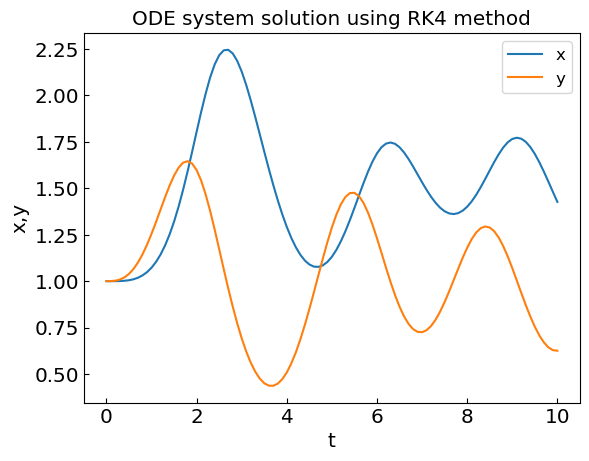

In [10]:
def ff(xin, t):
    x = xin[0]
    y = xin[1]
    return np.array([x*y-x,y-x*y+np.sin(t)**2])

a = 0.
b = 10.0
N = 100
h = (b-a)/N

tpoints = np.arange(a,b,h)
xpoints = []
ypoints = []

sol = ode_rk4_multi(ff,[1.0,1.0], a, h, N)
tpoints = sol[0]
xpoints = sol[1][:,0]
ypoints = sol[1][:,1]
plt.title("ODE system solution using RK4 method")
plt.xlabel('t')
plt.ylabel('x,y')
plt.plot(tpoints,xpoints,label='x')
plt.plot(tpoints,ypoints,label='y')
plt.legend()
plt.show()


## 2階の微分方程式

$N$元連立2階常微分方程式：

$$
\frac{d^2 \mathbf{x}}{dt^2} = \mathbf{f}(\mathbf{x}, d\mathbf{x}/dt,t),
$$

これは $d\mathbf{x}/dt = \mathbf{v}$ と書くことによって、$2N$ 元連立 1階微分方程式に書き直せる:

\begin{align*}
\frac{d \mathbf{x}}{dt} &= \mathbf{v},\\
\frac{d \mathbf{v}}{dt} &= \mathbf{f}(\mathbf{x}, \mathbf{v},t),
\end{align*}

これは通常の方法で解ける。

この方法は、古典力学の問題などは2階微分方程式であるので、そのような場合に使える。

## 陰解法と硬い方程式

次の常微分方程式の初期値問題を考える
$$
\frac{dx}{dt} = -15x,
$$
with $x(0) = 1$.

解析解はであることが知られる：
$$
x(t) = e^{-15t},
$$
$t \to \infty$ でこの解は0に漸近する。

オイラー法を適用すると、以下のように特に $h=1/4$ の場合に発散してしまう。

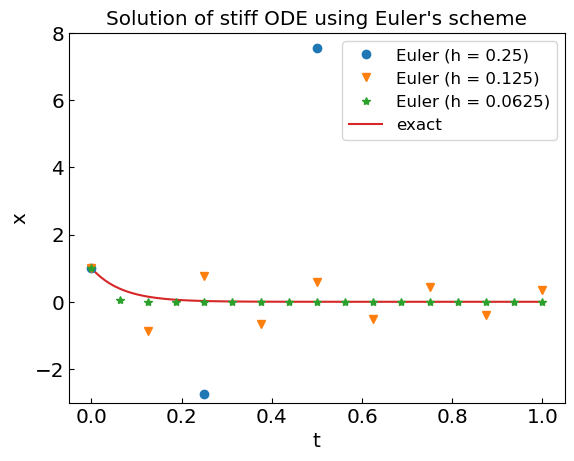

In [11]:
def f_stiff(x,t):
    return -15.*x

def x_stiff_sol(x,t):
    return np.exp(-15.*t)

h1 = 1./4.
t0 = 0.
tend = 1.0
N = round((tend - t0) / h1)
x0 = 1.

ODEsol_stiff1 = ode_euler(f_stiff,x0,t0,h1,N)

h2 = 1./8.
N = round((tend - t0) / h2)
ODEsol_stiff2 = ode_euler(f_stiff,x0,t0,h2,N)

h3 = 1./16.
N = round((tend - t0) / h3)
ODEsol_stiff3 = ode_euler(f_stiff,x0,t0,h3,N)

tref = np.linspace(0,1,100)
xref = x_stiff_sol(0., tref)

plt.plot(ODEsol_stiff1[0], ODEsol_stiff1[1], 'o', label='Euler (h = %.2f)' % h1)
plt.plot(ODEsol_stiff2[0], ODEsol_stiff2[1], 'v', label='Euler (h = %.3f)' % h2)
plt.plot(ODEsol_stiff3[0], ODEsol_stiff3[1], '*', label='Euler (h = %.4f)' % h3)
plt.plot(tref, xref, label='exact', zorder=1)

plt.ylim(-3.,8.)
plt.xlabel('t')
plt.ylabel('x')
plt.legend()
plt.title("Solution of stiff ODE using Euler's scheme")
plt.show()

オイラー法による数値解は以下のようになる：
$$
x_{n+1} = x_n - 15 h x_n = (1 - 15 h) x_n = (1-15h)^n x_0
$$
ただし $x_n \equiv x(t+nh)$ と定義した。

$h > 2/15$ の場合、$n \to \infty$ ($t \to \infty$ と等価) の極限で $|x_{n+1}| \to \infty$ となってしまう。
しかし、厳密解は $t \to \infty$ の極限で $x \to 0$ となる。

これは、ODE ソルバーの不安定性の例として知られる。特に、陽解法の問題点であるため、RK4でも同じ問題が起きる。

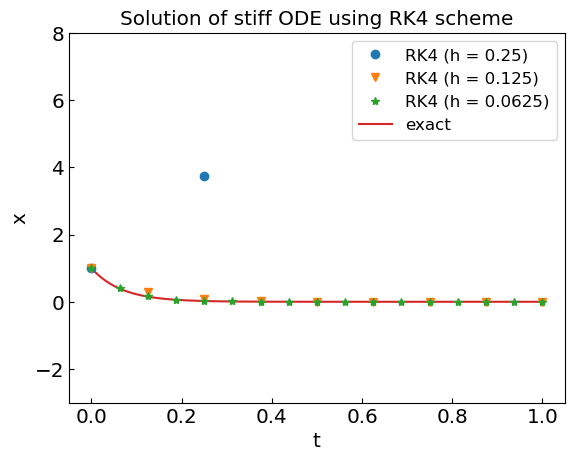

In [12]:
def f_stiff(x,t):
    return -15.*x

def x_stiff_sol(x,t):
    return np.exp(-15.*t)

h1 = 1./4.
t0 = 0.
tend = 1.0
N = round((tend - t0) / h1)
x0 = 1.

ODEsol_stiff1 = ode_rk4(f_stiff,x0,t0,h1,N)

h2 = 1./8.
N = round((tend - t0) / h2)
ODEsol_stiff2 = ode_rk4(f_stiff,x0,t0,h2,N)

h3 = 1./16.
N = round((tend - t0) / h3)
ODEsol_stiff3 = ode_rk4(f_stiff,x0,t0,h3,N)

tref = np.linspace(0,1,100)
xref = x_stiff_sol(0., tref)

plt.plot(ODEsol_stiff1[0], ODEsol_stiff1[1], 'o', label='RK4 (h = %.2f)' % h1)
plt.plot(ODEsol_stiff2[0], ODEsol_stiff2[1], 'v', label='RK4 (h = %.3f)' % h2)
plt.plot(ODEsol_stiff3[0], ODEsol_stiff3[1], '*', label='RK4 (h = %.4f)' % h3)
plt.plot(tref, xref, label='exact', zorder=1)
plt.ylim(-3.,8.)
plt.xlabel('t')
plt.ylabel('x')
plt.legend()
plt.title("Solution of stiff ODE using RK4 scheme")
plt.show()

## 陰解法

陰解法（implicit methods）では、次の時間ステップにおける変数の値が右辺に直接入ってくる。
たとえば、後退オイラー法は次のように表される：
$$x(t+h) = x(t) + h f\Big(x(t+h),t+h\Big).$$
上記の硬い方程式に適用すると、次のようになる：
$$x_{n+1} = x_n - 15 h x_{n+1},$$
したがって、
$$x_{n+1} = \frac{x_n}{1+15h} = \frac{x_0}{(1+15h)^n}.$$
ここで、任意の $h>0$ に対して $n \to \infty$ のときに $x_{n+1} \to 0$ となる。
すなわち、この方法は安定である。
特に硬い方程式に対しては、非常に高い安定性が陰解法の主な利点である。
ただし、欠点として、各時間ステップで $x_{n+1}$（または $x(t+h)$）を決定するために方程式（一般にこの方程式は非線形になる）を解かなければならないという点が挙げられる。

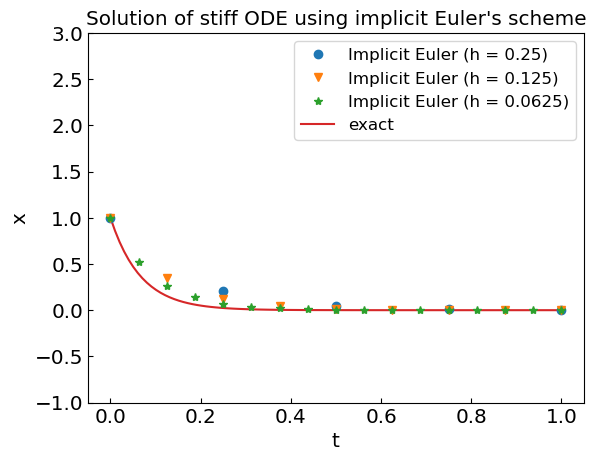

In [13]:
def stiff_implicit(x0,t0,h,nsteps,k=-15.):
    t = np.zeros(nsteps + 1)
    x = np.zeros(nsteps + 1)
    x[0] = x0
    t[0] = t0
    for i in range(0, nsteps):
        t[i + 1] = t[i] + h
        x[i + 1] = x[i] / (1 - k*h)
    return t,x

t0 = 0.
tend = 1.0
h1 = 1./4.
N = round((tend - t0) / h1)
ODEsol_stiff1 = stiff_implicit(x0,t0,h1,N)

h2 = 1./8.
N = round((tend - t0) / h2)
ODEsol_stiff2 = stiff_implicit(x0,t0,h2,N)

h3 = 1./16.
N = round((tend - t0) / h3)
ODEsol_stiff3 = stiff_implicit(x0,t0,h3,N)

tref = np.linspace(0,1,100)
xref = x_stiff_sol(0., tref)

plt.plot(ODEsol_stiff1[0], ODEsol_stiff1[1], 'o', label='Implicit Euler (h = %.2f)' % h1)
plt.plot(ODEsol_stiff2[0], ODEsol_stiff2[1], 'v', label='Implicit Euler (h = %.3f)' % h2)
plt.plot(ODEsol_stiff3[0], ODEsol_stiff3[1], '*', label='Implicit Euler (h = %.4f)' % h3)
plt.plot(tref, xref, label='exact', zorder=1)
plt.ylim(-1.,3.)
plt.xlabel('t')
plt.ylabel('x')
plt.legend()
plt.title("Solution of stiff ODE using implicit Euler's scheme")
plt.show()

## 適応刻み幅制御

計算の精度に応じて時間ステップ $h$ を適応的に制御することは有用である。
もし $h$ が小さすぎると、無駄に計算リソースを浪費してしまい、多くの計算を行うことになる。
一方で、$h$ が大きすぎると、所望の精度を達成できなくなる。


この問題を解決するために、各ステップで誤差の推定値を導入し、それに応じて時間ステップを調整して誤差を減少させることができる。
一つの方法として、異なる次数の2つのルンゲ・クッタ法を組み合わせることが挙げられる。
2つの結果の差が、現在のステップサイズに対する誤差の推定値を提供し、その後必要に応じて調整できる。
[ルンゲ・クッタ・フェルバーグ法](https://en.wikipedia.org/wiki/Runge%E2%80%93Kutta%E2%80%93Fehlberg_method) は、4次と5次のルンゲ・クッタ法を組み合わせた有名な例である。


ここでは、4次のルンゲ・クッタ法に適用される別のアプローチを考えてみる。
1つの時間ステップ $h$ に対する誤差は $ch^5$ のオーダーであることを考慮しよう。
2つのRK4ステップ $h$ を取って $x(t+2h) \approx x_1$ を近似する。
その時、誤差の推定値は次のようになる：
$$x(t+2h) = x_1 + 2 c h^5. $$
一方で、$x(t+2h)$ はサイズ $2h$ の単一のRK4ステップによっても近似でき、これは次のようになる：
$$x(t+2h) = x_2 + 32 c h^5. $$
したがって、サイズ $h$ の単一のRK4ステップに対する誤差 $\epsilon c h^5$ は次のように表される：
$$\epsilon = |c h^5| = \frac{|x_1 - x_2|}{30}.$$
もし単位時間あたりの所望の精度が $\delta$ であれば、時間ステップあたりの所望の精度は $h' \delta$ となり、したがって $h'$ は次のように設定されるべきである：
$$h' = h \left( \frac{30 h \delta}{|x_1 - x_2|} \right)^{1/4}~.$$

In [14]:
def ode_rk4_adaptive(f, x0, t0, h0, tmax, delta = 1.e-6):
    """
    常微分方程式 dx/dt = f(x,t) を t = t_0 から t = t_0 + h * steps までRK4法で、適応刻み幅制御によって解く。

    Args:
    （引数）
          f: ODEを定義する関数
         x0: 従属変数の初期値
         t0: 時間変数の初期値
         h0: 時間ステップの初期値
       tmax: 時刻の最大値
      delta: 各時刻での所望の精度

    Returns:
    （戻り値）
    t,x: 時間変数と従属変数の配列
    """
    
    ts = [t0]
    xs = [x0]
    h = h0
    t = t0
    i = 0
    while (t < tmax):
        if (t + h >= tmax):
            ts.append(tmax)
            h = tmax - t
            xs.append(ode_rk4_step(f, xs[i], ts[i], h))
            t = tmax
            break
        
        x1 = ode_rk4_step(f, xs[i], ts[i], h)
        x1 = ode_rk4_step(f, x1, ts[i] + h, h)
        x2 = ode_rk4_step(f, xs[i], ts[i], 2*h)
        
        rho = 30. * h * delta / np.abs(x1 - x2)
        if rho < 1.:
            h *= rho**(1/4.)
        else:
            if (t + 2.*h) < tmax:
                xs.append(x1)
                ts.append(t + 2*h)
                t += 2*h
            else:
                xs.append(ode_rk4_step(f, xs[i], ts[i], h))
                ts.append(t + h)
                t += h
            i += 1
            h = min(2.*h, h * rho**(1/4.))
        
    return ts,xs

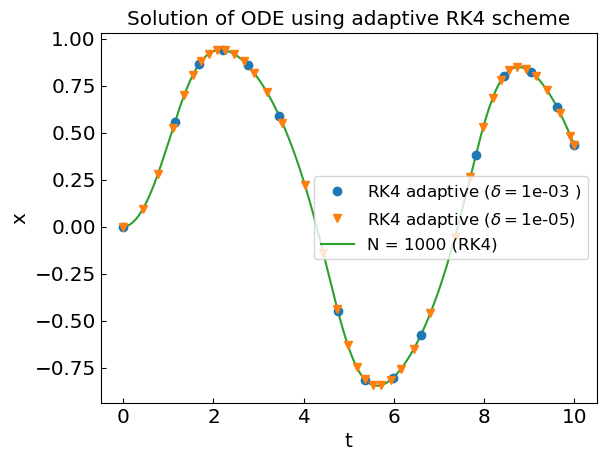

In [15]:
def f(x, t):
    return -x**3 + np.sin(t)

t0 = 0.
tend = 10.0
x0 = 0.

N = 10
h = (tend - t0) / N
delta = 1.e-3
ODEsolN10RK4adaptive = ode_rk4_adaptive(f,x0,t0,h,tend, delta)

delta2 = 1.e-5
ODEsolN10RK4adaptive2 = ode_rk4_adaptive(f,x0,t0,h,tend, delta2)

plt.plot(ODEsolN10RK4adaptive[0], ODEsolN10RK4adaptive[1], 'o', label='RK4 adaptive (${\\delta}=$%1.e )' % delta)
plt.plot(ODEsolN10RK4adaptive2[0], ODEsolN10RK4adaptive2[1], 'v', label='RK4 adaptive (${\\delta}=$%1.e)' % delta2)
plt.plot(ODEsolN1000[0], ODEsolN1000[1], label='N = 1000 (RK4)', zorder=1)
plt.xlabel('t')
plt.ylabel('x')
plt.legend()
plt.title("Solution of ODE using adaptive RK4 scheme")
plt.show()

## 実習タイム： 単振り子の運動方程式

![単振り子](./pendulum.gif)

上図のような単振り子の運動方程式を考えよう。
$$
m L \frac{d^2 \theta}{dt^2} = - m g L \sin \theta\,.
$$

2階微分方程式である運動方程式を角速度 $\omega = d\theta / d t$ を使って、1階の連立微分方程式に書き直す。
\begin{align}
\frac{d \theta}{dt} & = \omega\,, \\
\frac{d \omega}{dt} & = -\frac{g}{L} \sin \theta\,,
\end{align}
**これを、RK4 で（上で定義した関数 ode_rk4_multi を使って）解いて、その結果をプロットせよ。**

**初期条件としては、$\theta(t=0)=\theta_0, \ \omega(t=0) = 0$ を選び、$\theta_0$の値を変えて解の変化を観察せよ。**

十分小さい角 $\theta \ll 1$ については、 $\sin \theta \approx \theta$ と近似できて、単振動の方程式に帰着する：
$$
m L \frac{d^2 \theta}{dt^2} \approx - m g \theta\,.
$$
初期条件として、十分小さい単振り子の角度 $\theta = \theta_0 \ll 1$ を与えると、解析解は
$$
\theta(t) \approx \theta_0 \cos\left( \sqrt{\frac{g}{L}} t + \phi\right)\,,
$$
となる。ただし、振り子が $t=0$ で静止していれば (つまり、$\omega(t=0)=0$) 積分定数 $\phi = 0$ となる。

**この解析解 (関数 theta_small_angle )を、特に $\theta_0$ が大きいときに、上で求めた数値解と重ねてプロットして比較してみよ。**

必要なパラメターはすでに定義してあるので、以下を穴埋めせよ：

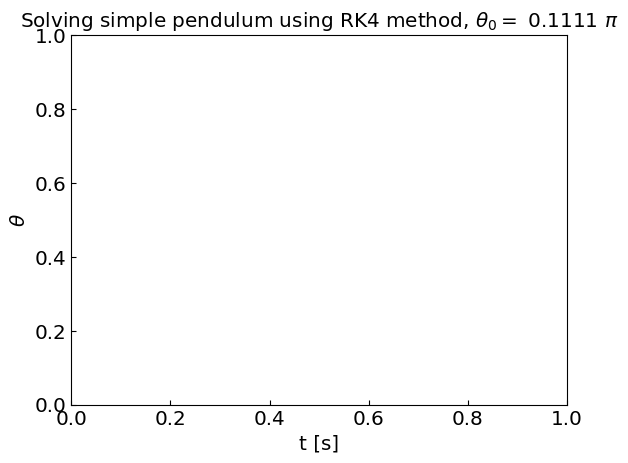

In [16]:
# 重力加速度と振り子の長さの定義
g = 9.81 # [m / s^2]
L = 0.1 # [m]

# 運動方程式の定義
def fpendulum(xin, t):
    theta = xin[0]
    omega = xin[1]
    return np.array([omega,-g/L * np.sin(theta)])

# 運動方程式の初期条件、刻み幅などの設定

# theta0 を変えて解析解と比較しよう
theta0 = (20./180.) * np.pi # [radian]
omega0 = 0. # [1/s]

x0 = np.array([theta0,omega0]) # 初期条件の配列
a = 0. # [s] 初期時刻
b = 2.0 # [s] 終端時刻
N = 5000 # ステップ数
h = (b-a)/N # 刻み幅

# ここで微分方程式を、上で定義した ode_rk4_multi を使って解く
# sol = ...

#　角度が小さい場合の解析解：
def theta_small_angles(t):
    return theta0 * np.cos(np.sqrt(g/L) * t)


plt.title("Solving simple pendulum using RK4 method, $\\theta_0 =$ %.4f $\\pi$" % (theta0 / np.pi))
plt.xlabel('t [s]')
plt.ylabel('${\\theta}$')
# ここで微分方程式の解をプロット

# plt.legend() # 凡例を表示
plt.show()

今日議論したことはすべて scipy.integrate.solve_ivp で1行で書けてしまう……

しかし、いずれにせよ、ライブラリの中身を知ることは有用である。